In [5]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from timeit import default_timer as timer
import lightning as L
from torch.utils.data import DataLoader, random_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Setup training data
train_data = datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=ToTensor(),
)

# Setup testing data
test_data = datasets.MNIST(
    root='./data/',
    train=False, # get test data
    download=True,
    transform=ToTensor()
)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:06<00:00, 1.43MB/s]


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 272kB/s]


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.50MB/s]


Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



In [56]:
train_transform = transforms.Compose([
    transforms.RandomCrop(28, padding=2),
    transforms.RandomRotation(degrees=(-15, 15)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data/', download=False, train=True, transform=train_transform)
test_dataset = datasets.MNIST('./data/', download=False, train=False, transform=val_transform)
test_dataset, val_dataset = random_split(test_dataset, [0.50, 0.50])

In [15]:
train_dataset[2][0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '1')

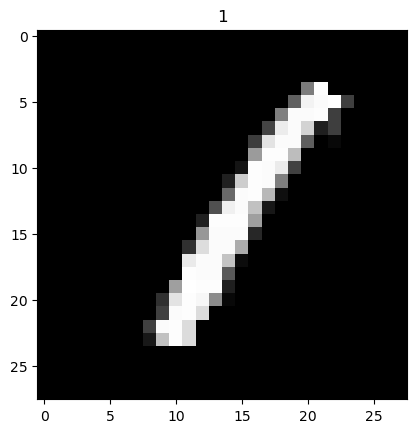

In [68]:
plt.imshow(train_dataset[3][0].squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(train_dataset[3][1])